## NOTEBOOK IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## CONSTANTS

In [2]:
TOKEN_SPAM_PROB_FILE = './SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = './SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = './SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = './SpamData/03_Testing/test-features.txt'
TEST_TARGET = './SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## LOAD THE DATA

In [3]:
# FEATURES
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# TARGET
y_test = np.loadtxt(TEST_TARGET, delimiter=' ')

# TOKEN PROBABILITIES
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## CALCULATING THE JOINT PROBABILITY
### The dot Product

In [5]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])

In [6]:
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [7]:
a.dot(b)

22

**The Dimentions of The dot product between X_test and prob_token_spam**

In [8]:
X_test.shape

(1724, 2500)

In [9]:
prob_token_spam.shape

(2500,)

In [10]:
print('Shape of dot product:', (X_test.dot(prob_token_spam).shape))

Shape of dot product: (1724,)


## SET THE PRIOR

### $$ P(Spam \, | \, X ) = \frac {P(X \, | \, Spam) \, P(Spam)} {P(X)}  $$

**Challenge:** Calculate the Log Probabilities of the tokens given that the email was spam.

In [11]:
PROB_SPAM = 0.3116

In [12]:
np.log(prob_token_spam)

array([ -4.40765904,  -5.25373385,  -4.99013629, ...,  -9.52933102,
        -9.09854811, -10.30252091])

## JOINT PROBABILITY IN LOG FORMAT

In [13]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [14]:
joint_log_spam[:5]

array([24.26314294,  2.15850712, 20.58639451, 17.73489268, 20.49524781])

**Challenge:** The Log probability that the emails are non-spam given their tokens.

### $$ P(Ham \, | \, X ) = \frac {P(X \, | \, Ham) \, (1 - P(Spam))} {P(X)}  $$

In [15]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [16]:
joint_log_ham[:5]

array([-60.95907504, -11.00827965, -37.96467567, -59.12149097,
       -53.78024979])

In [17]:
joint_log_ham.size

1724

# MAKING PREDICTIONS
## checking for the higher joint probability

### $$ P(Spam \, | \, X) > P(Ham \, | \, X) $$
### <center> OR </center>
### $$ P(Spam \, | \, X) < P(Ham \, | \, X) $$

***CHALLENGE:*** Create the vector of predictions, our $\hat y$. Spam Emails should have the value 1 (True) and non-spam emails should have the value 0 (False). Store the results in a variable called `predictions`

In [18]:
prediction = joint_log_spam > joint_log_ham

In [19]:
prediction[-5:]*0

array([0, 0, 0, 0, 0])

In [20]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## SIMPLIFY

## $$ P(X \, | \, Spam) \, P(Spam) \not = { \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)} }$$

In [21]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

## METRICS AND EVALUATION

### Accuracy

In [22]:
correct_docs = (y_test == prediction).sum()
print("Docs classified Correctly: ", correct_docs)
num_docs_wrong = X_test.shape[0] - correct_docs
print("Docs Classified Incorrectly: ", num_docs_wrong)

Docs classified Correctly:  1685
Docs Classified Incorrectly:  39


In [23]:
fraction_wrong = num_docs_wrong/X_test.shape[0]
print('Fraction Classified Incorrectly: {:.2%}'.format(fraction_wrong))
print('Accuracy of the model: {:.2%}'.format(1 - fraction_wrong))

Fraction Classified Incorrectly: 2.26%
Accuracy of the model: 97.74%


## VISUALIZING THE RESULTS

In [24]:
# CHART STYLING INFO
x_label = 'P(X | Spam)'
y_label = 'P(X | Non-Spam)'

line_data = np.linspace(start=-14000, stop=0, num=10000)

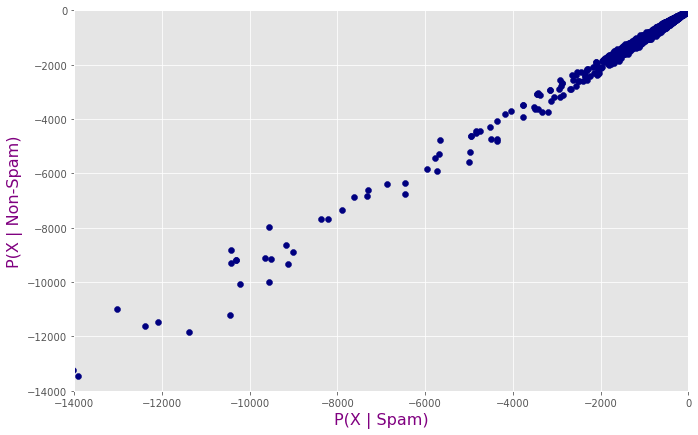

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=[11, 7])
plt.xlabel(x_label, fontsize=16, color='purple')
plt.ylabel(y_label, fontsize=16, color='purple')

# SET SCALE
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## DECISION BOUNDARY

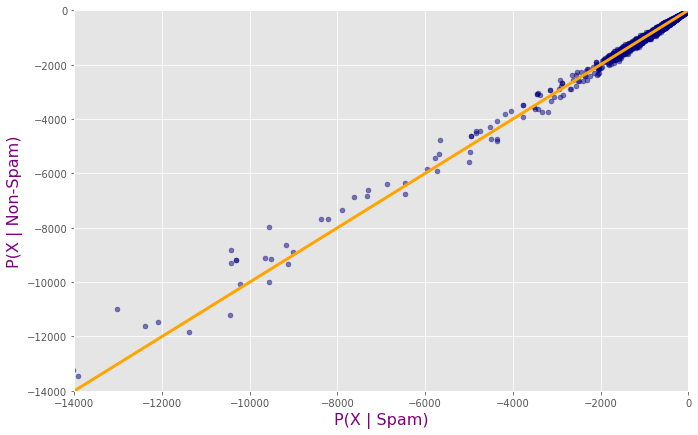

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=[11, 7])
plt.xlabel(x_label, fontsize=16, color='purple')
plt.ylabel(y_label, fontsize=16, color='purple')

# SET SCALE
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(line_data, line_data, color='orange', linewidth=3)

plt.show()

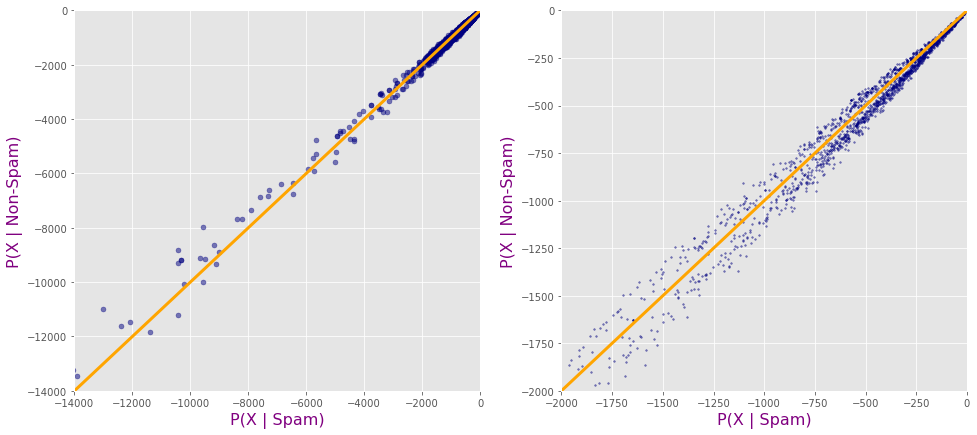

In [27]:
plt.style.use('ggplot')

plt.figure(figsize=[16, 7])

# Chart Nr 1:
plt.subplot(1, 2, 1)
plt.xlabel(x_label, fontsize=16, color='purple')
plt.ylabel(y_label, fontsize=16, color='purple')

# SET SCALE
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(line_data, line_data, color='orange', linewidth=3)

# Chart Nr 2:
plt.subplot(1, 2, 2)
plt.xlabel(x_label, fontsize=16, color='purple')
plt.ylabel(y_label, fontsize=16, color='purple')

# SET SCALE
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(line_data, line_data, color='orange', linewidth=3)

plt.show()

In [28]:
# CHART STYLING 
labels = 'Actual Category'
my_colors = ['#4A71C0', '#AB3A2C']

summary_df = pd.DataFrame({y_label: joint_log_spam, x_label: joint_log_ham, labels: y_test})

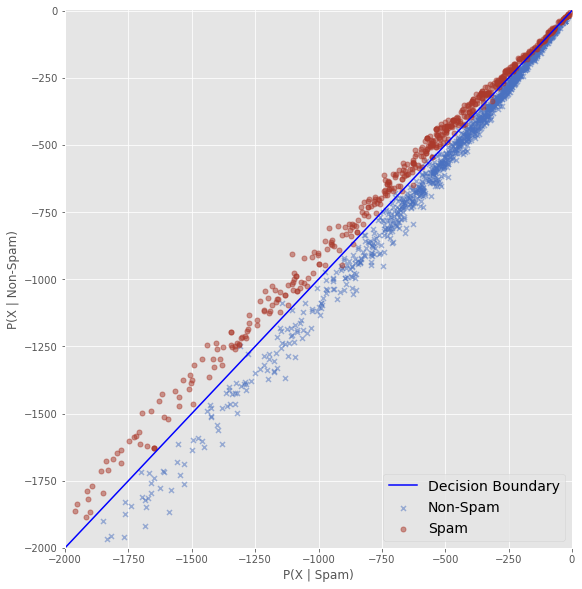

In [38]:
plt.style.use('ggplot')
sns.lmplot(x=x_label, y=y_label, data=summary_df, height=8, fit_reg=False, scatter_kws={'alpha':0.5, 's':25},
           hue=labels, markers=['x', 'o'], palette=my_colors, legend=False)

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(line_data, line_data, color='blue')
plt.legend(('Decision Boundary', 'Non-Spam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

## FALSE POSITIVES AND FALSE NEGATIVES

In [30]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [31]:
true_pos = (y_test == 1) & (prediction == 1)

In [32]:
true_pos.sum()

569

In [33]:
true_pos

array([ True,  True,  True, ..., False, False, False])

```CHALLENGE:``` Create  a numpy array that measures the False Positives for each datapoint. call this variable ```false_pos```. then work out how many false positives there were.

In [34]:
false_pos = (y_test == 0) & (prediction == 1) 
false_pos.sum()

19

In [47]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

20

## RECALL SCORE
**CHALLENGE:** Calculate the recall score. store it in variable called recall_score. print the value of the recall score as a precentage rounded to two decimal places.

In [45]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())

In [46]:
print('Value of the recall score: {:.2%}'.format(recall_score))

Value of the recall score: 96.60%


## PRECISION SCORE

**Challenge:** Calculate the precision of our Naive Bayes Model. store the result in a variable called ```precision_score```

In [58]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())

In [62]:
print('The Precision score is: {:.2}'.format(precision_score))

The Precision score is: 0.97


## F-SCORE

In [71]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)

In [72]:
print("F-Score is {:.2}".format(f1_score))

F-Score is 0.97
